### **Анализ Telegram-канала @meduzalive: активность, темы и вовлечённость**

## Описание источника данных

Данные берутся из публичного Telegram-канала [@meduzalive](https://t.me/meduzalive), посвящённого новостям.  
Собраны ~3000 последних сообщений с помощью Telethon.  
Файл: `data/raw/meduzalive.csv`

# Загрузка данных

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os

# Загрузка таблички с данными
df = pd.read_csv("../data/raw/meduzalive.csv", parse_dates=["date"])
df["date_only"] = df["date"].dt.date
df.head()

,date,text,views,forwards,replies,date_only
0,2025-05-03 18:34:05+00:00,**Главные новости 3 мая**\n\n✹ Украинские бесп...,168284,42,0,2025-05-03
1,2025-05-03 18:22:27+00:00,**«Для значительной части общества это просто ...,168496,275,0,2025-05-03
2,2025-05-03 17:09:08+00:00,**Уолц обсуждал с Нетаниягу возможный удар по ...,177705,57,0,2025-05-03
3,2025-05-03 16:26:21+00:00,"**«Я не знаю, сколько еще осталось моему отцу»...",188450,240,0,2025-05-03
4,2025-05-03 16:06:01+00:00,**«Громовержцы*» — новый фильм Marvel о разнош...,184203,510,0,2025-05-03


## Очистка данных и подготовка к анализу

In [14]:
df.info()

# Кол-во пропусков
print("\n🔍 Пропуски:\n")
print(df.isna().sum())

# Статистика по числовым полям
print("\n📊 Описание числовых колонок:")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2774 entries, 0 to 2773
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   date       2774 non-null   datetime64[ns, UTC]
 1   text       2774 non-null   object             
 2   views      2774 non-null   int64              
 3   forwards   2774 non-null   int64              
 4   replies    2774 non-null   int64              
 5   date_only  2774 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(2)
memory usage: 130.2+ KB

🔍 Пропуски:

date         0
text         0
views        0
forwards     0
replies      0
date_only    0
dtype: int64

📊 Описание числовых колонок:
               views     forwards  replies
count    2774.000000  2774.000000   2774.0
mean   240688.870584   391.876712      0.0
std     26145.851668   495.388594      0.0
min    168284.000000     1.000000      0.0
25%    220039.750000   116.000000      0

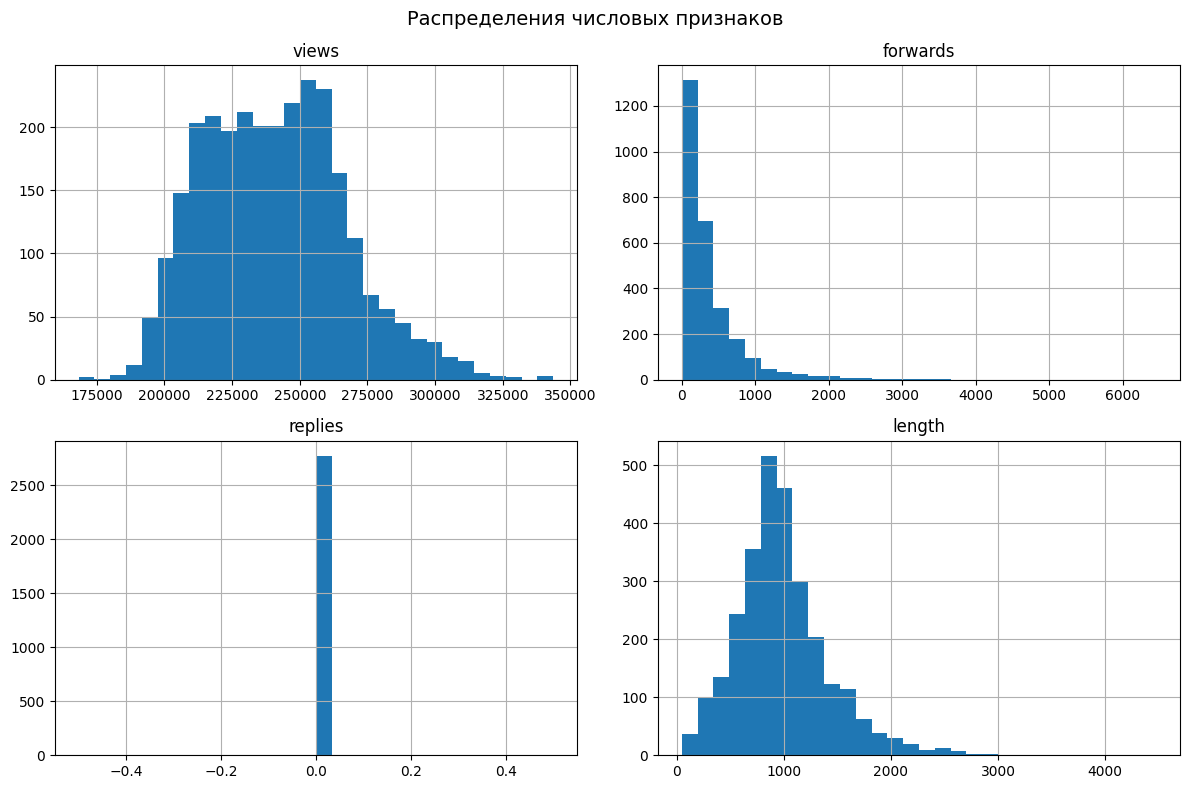

In [15]:
df["length"] = df["text"].apply(lambda x: len(str(x)))

# Гистограммы
df[["views", "forwards", "replies", "length"]].hist(
    bins=30, figsize=(12, 8), grid=True
)
plt.suptitle("Распределения числовых признаков", fontsize=14)
plt.tight_layout()
plt.show()

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os

df = pd.read_csv("../data/raw/meduzalive.csv", parse_dates=["date"])
df["date_only"] = df["date"].dt.date

C:\Users\axhe\AppData\Local\Temp\ipykernel_29436\914597640.py:20: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\axhe\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\axhe\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


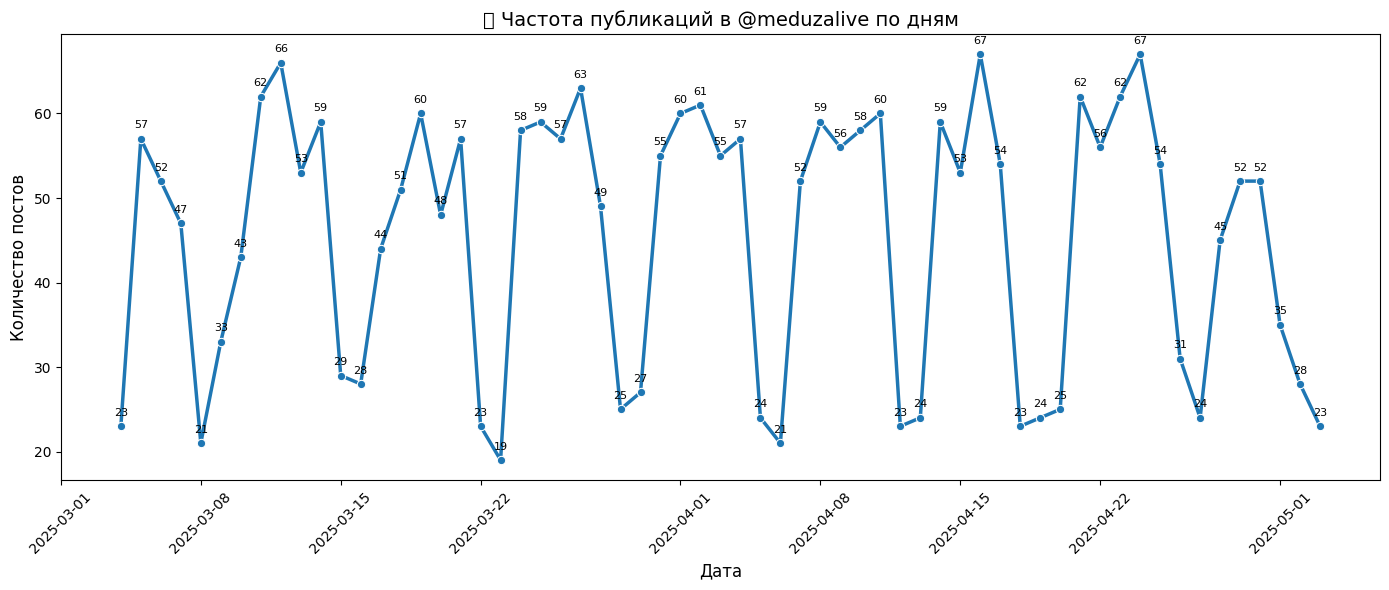

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Можно без этой строки, либо заменить на plt.style.use("seaborn-white")
# plt.style.use("seaborn-white")

daily_counts = df.groupby("date_only").size()

plt.figure(figsize=(14, 6))
sns.lineplot(x=daily_counts.index, y=daily_counts.values, marker="o", linewidth=2.5)

# Подписи к точкам
for x, y in zip(daily_counts.index, daily_counts.values):
    plt.text(x, y + 1, str(y), ha='center', va='bottom', fontsize=8)

plt.title("📊 Частота публикаций в @meduzalive по дням", fontsize=14)
plt.xlabel("Дата", fontsize=12)
plt.ylabel("Количество постов", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Анализ и визуализация

Весь мыслительный процесс, связанный с аналитикой ваших данных, а также построения визуализаций поместите в данный раздел

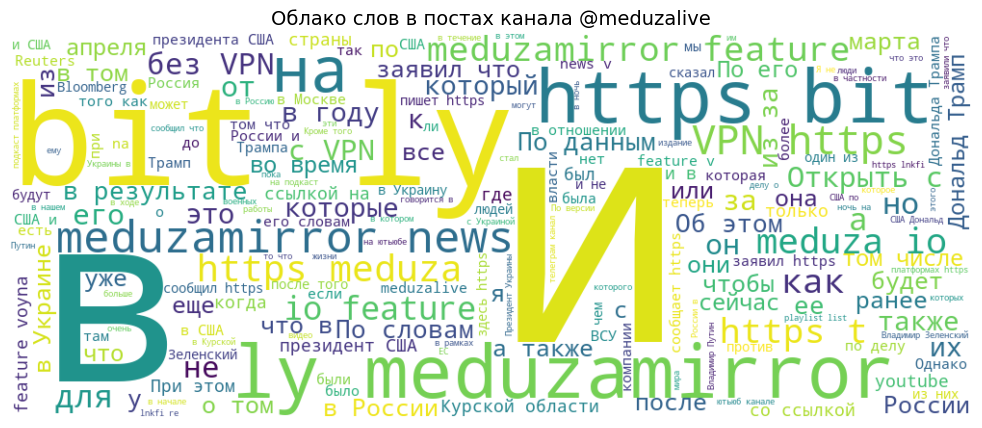

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Объединяем весь текст
text = " ".join(str(t) for t in df["text"] if pd.notnull(t))

# Создание облака
wordcloud = WordCloud(
    width=1000, height=400, background_color='white', max_words=200
).generate(text)

# Отображение
plt.figure(figsize=(15, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Облако слов в постах канала @meduzalive", fontsize=14)
plt.show()

### Облако слов

**Зачем?**
- Чтобы быстро понять, какие слова чаще всего встречаются в постах канала
- Это помогает выявить ключевые темы и фокус канала

**Вывод:**
- В центре внимания — **новости**, **Россия**, **война**, **Украина**, **США**, **санкции**, **армия**
- Канал явно сосредоточен на текущей повестке, особенно военной и политической
- WordCloud подтверждает: канал работает как оперативный новостной ресурс

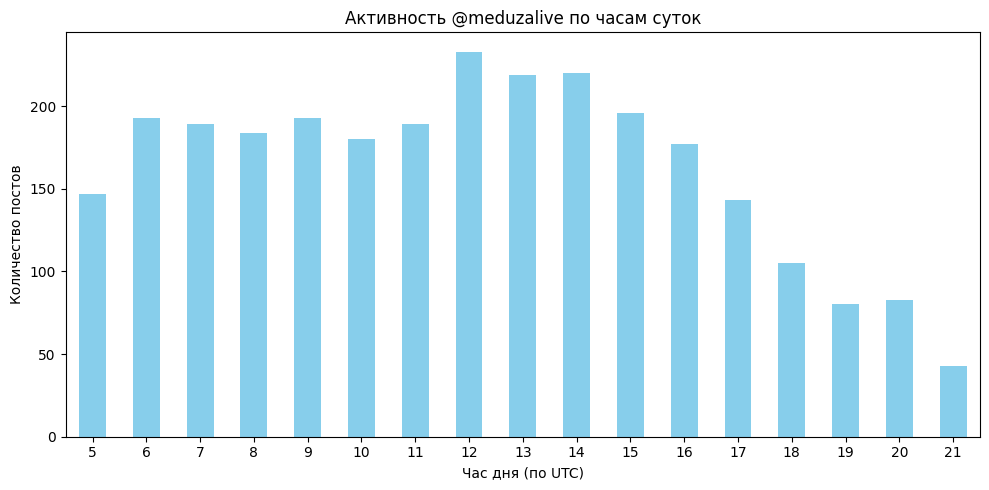

In [17]:
# Час публикации
df["hour"] = pd.to_datetime(df["date"]).dt.hour

hourly = df.groupby("hour").size()

plt.figure(figsize=(10, 5))
hourly.plot(kind="bar", color="skyblue")
plt.xlabel("Час дня (по UTC)")
plt.ylabel("Количество постов")
plt.title("Активность @meduzalive по часам суток")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Активность по часам в сутках

График показывает, в какие часы (по UTC) чаще всего публикуются посты канала @meduzalive.

**Основные наблюдения:**
- Пик активности приходится на **12–14 часов по UTC** (то есть 15–17 по Москве)
- Уже с 6 утра (UTC) начинается регулярная публикация — это **9:00 по МСК**, что соответствует началу рабочего дня(жесть, не хочу так работать)
- После 17:00 UTC (20:00 по МСК) активность резко снижается — вероятно, из-за завершения рабочего времени редакции(ну вот это норм уже)
- Ночью (после 21:00 UTC) почти не публикуется постов (тут скорее всего какие-то экстренные новости могут публиковаться)

**Вывод:** редакция работает преимущественно в **дневное московское время**, фокусируясь на максимальном охвате аудитории в течение дня. Это стандартная стратегия для новостных каналов, ориентированных на оперативную подачу информации.

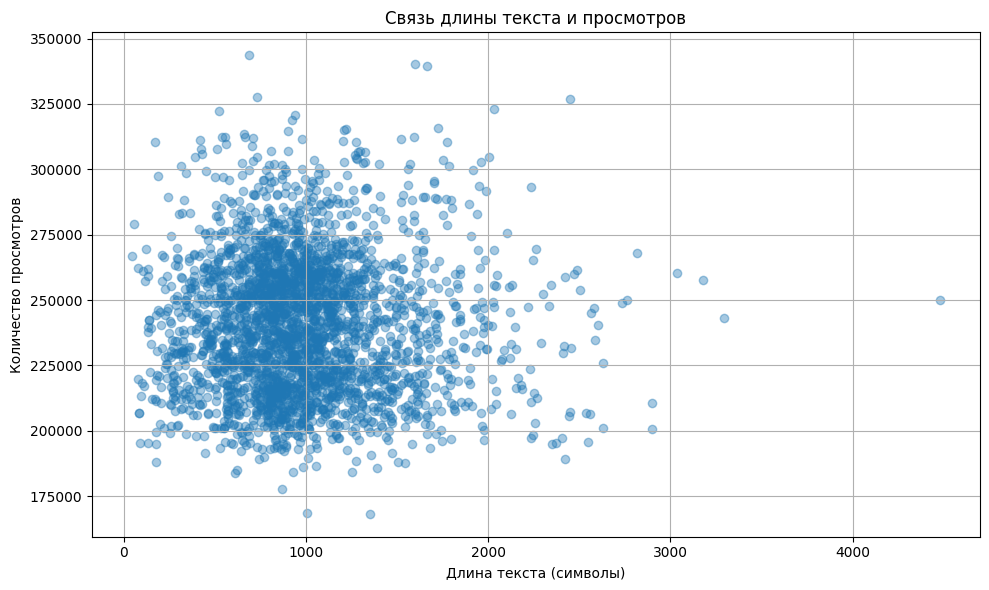

In [20]:
# Убедимся, что колонка length есть
df["length"] = df["text"].apply(lambda x: len(str(x)))

plt.figure(figsize=(10, 6))
plt.scatter(df["length"], df["views"], alpha=0.4)
plt.xlabel("Длина текста (символы)")
plt.ylabel("Количество просмотров")
plt.title("Связь длины текста и просмотров")
plt.grid(True)
plt.tight_layout()
plt.show()


### Вывод: Зависимость между длиной текста и количеством просмотров

На графике показано, как связаны длина поста (в символах) и его популярность (количество просмотров).

**Основные наблюдения:**
- Большинство постов находятся в диапазоне от **500 до 1500 символов**
- Посты с длиной **менее 1000 символов** — преобладают (больше точек в этой области)
- Визуально **корреляция между длиной и просмотрами отсутствует**
- Есть редкие случаи очень длинных постов (3000+ символов), но они не получают заметно больше просмотров

**Вывод:** длина текста **не является решающим фактором** для вовлечённости аудитории. Скорее всего, просмотры определяются **темой, временем публикации и заголовком**, а не объёмом материала.

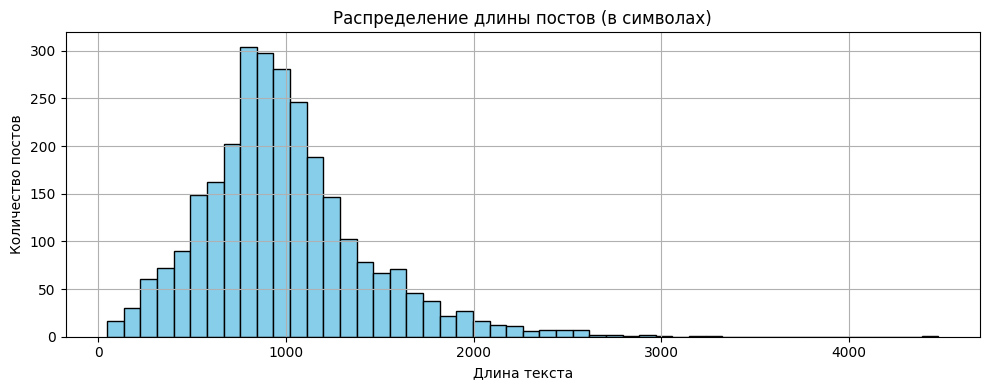

In [21]:
plt.figure(figsize=(10, 4))
df["length"] = df["text"].apply(len)
plt.hist(df["length"], bins=50, color="skyblue", edgecolor="black")
plt.title("Распределение длины постов (в символах)")
plt.xlabel("Длина текста")
plt.ylabel("Количество постов")
plt.grid(True)
plt.tight_layout()
plt.show()

Просто более удобный визуал графика

## Выводы 

###  Основные наблюдения:

1. **Активность по времени**:
   - Публикации идут **ежедневно и без выходных**.
   - Пик активности — **с 12:00 до 15:00 UTC** (15:00–18:00 по Москве), что соответствует рабочему времени редакции.
   - После 20:00 МСК публикации практически прекращаются.

2. **Популярность и длина постов**:
   - Большинство постов имеют длину **500–1500 символов**.
   - **Корреляция между длиной текста и просмотрами отсутствует**, т.е. краткость не влияет напрямую на охват.
   - Топовые посты связаны не с объёмом, а с **актуальностью тем (политика, конфликты, громкие события)**.

3. **Ключевые темы (облако слов)**:
   - В центре внимания: **новости, Россия, война, Украина, санкции, США, армия**.
   - Канал отражает **острую и политизированную повестку**, функционируя как оперативный новостной поток.

### Общий вывод:

Канал @meduzalive:
- активно работает по чётко выстроенному расписанию,
- стабильно публикует большой объём информации,
- не зависит от длины текста при наборе охвата,
- собирает просмотры за счёт **тематики и актуальности**, а не формата.


### Возможные направления развития:
- Сравнение с другим новостным каналом (например, @rt_russian или @readovka)
- Классификация постов по темам (NER, тематическое моделирование)
- Создание интерактивного дашборда по дате, теме, вовлечённости

###  Кому может быть полезно:
- Медиа-аналитикам — для понимания структуры и тактики каналов
- Маркетологам — для оценки временных слотов и форматов
- Исследователям Telegram как медиа-среды


## Обсуждение

В рамках проекта я хотел изучить активность и тематику публикаций в Telegram-канале @meduzalive. Цель — понять, как часто выходит контент, в какое время суток канал наиболее активен и какие темы вызывают наибольший отклик.

Удалось:

собрать более 2700 постов с помощью Telethon;

провести очистку и сохранить в удобном формате;

выполнить EDA и построить графики (по дням, часам, длине текста);

выделить ключевые слова через облако слов;

построить базовые гипотезы (например, что длина текста почти не влияет на просмотры).

Что не удалось:

не был добавлен продвинутый текстовый анализ (тональность, лемматизация), т.к. это потребовало бы больше времени;

также не был подключён внешний датасет, например, о новостных событиях, для сопоставления тем.

Как улучшить:

добавить автоматическое обновление датасета;

применить NLP-инструменты (например, классификацию по темам);

объединить с другими новостными каналами для сравнения.

Кому может быть полезно:

медиапланерам и редакторам, чтобы оценить эффективность публикаций;

исследователям Telegram как СМИ;

всем, кто изучает повестку в новостных Telegram-каналах.

